In [ ]:
!pip install -q pyomo

In [ ]:
from pyomo.environ import *
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('lab8_ex2.csv')  #read the data
df

,i,Ri,Vi,Bi,Ai,Ti,Di
0,1,175,945,2800,23,2.962963,0.024339
1,2,450,832,3900,40,4.687500,0.048077
2,3,1050,2007,24900,78,12.406577,0.038864
3,4,900,800,36450,64,45.562500,0.080000
4,5,19,780,366,4,0.469231,0.005128
5,6,3550,5005,38500,150,7.692308,0.029970


In [ ]:
model_1 = ConcreteModel()   #create the model

In [ ]:
row_indices = np.arange(6)

In [ ]:
#declare decision variables
model_1.a0 = Var(domain=NonNegativeReals)
model_1.a1 = Var(domain=Reals)
model_1.a2 = Var(domain=Reals)
model_1.b = Var(row_indices, domain=NonNegativeReals)

In [ ]:
#declare objective function
model_1.obj = Objective(expr=sum(model_1.b[i] for i in range(6)), sense = minimize)

In [ ]:
#declare the constraints
model_1.constraints = ConstraintList()

In [ ]:
for i in row_indices:
  model_1.constraints.add(expr = (model_1.b[i] - (df['Ri'][i] - (model_1.a0 + model_1.a1*df['Ti'][i] + model_1.a2*df['Di'][i]))) >= 0)
  model_1.constraints.add(expr = (model_1.b[i] + (df['Ri'][i] - (model_1.a0 + model_1.a1*df['Ti'][i] + model_1.a2*df['Di'][i]))) >= 0)

In [ ]:
model_1.pprint()

2 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   12 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

4 Var Declarations
    a0 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    a1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    a2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  None :  None : False :  True :  Reals
    b : Size=6, Index=b_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegati

In [ ]:
!apt-get install -y -qq coinor-cbc

In [ ]:
opt_cbc = SolverFactory('cbc')

In [ ]:
result = opt_cbc.solve(model_1)
print(result)


Problem: 
- Name: unknown
  Lower bound: 3986.158702
  Upper bound: 3986.158702
  Number of objectives: 1
  Number of constraints: 13
  Number of variables: 10
  Number of nonzeros: 6
  Sense: minimize
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created subproblems: None
    Black box: 
      Number of iterations: 7
  Error rc: 0
  Time: 0.024248361587524414
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [ ]:
#display solution
print('\nObjective = ', model_1.obj())

print('\nDecision Variables')
print('a0 = ', model_1.a0())
print('a1 = ', model_1.a1())
print('a2 = ', model_1.a2())

print('\nConstraints')
model_1.constraints.display()


Objective =  3986.158753

Decision Variables
a0 =  0.0
a1 =  4.0039722
a2 =  8969.6127

Constraints
constraints : Size=12
    Key : Lower : Body                    : Upper
      1 :   0.0 :      110.34330526440641 :  None
      2 :   0.0 :   7.355935807140668e-07 :  None
      3 :   0.0 : -1.1947778943977028e-06 :  None
      4 :   0.0 :  1.1947778943977028e-06 :  None
      5 :   0.0 :   2.027175128205272e-06 :  None
      6 :   0.0 :      1303.4591979728248 :  None
      7 :   0.0 :  -6.374999657055014e-07 :  None
      8 :   0.0 :   6.374999657055014e-07 :  None
      9 :   0.0 :       57.75359965066413 :  None
     10 :   0.0 :  3.4933587400587385e-07 :  None
     11 :   0.0 :   4.785999544765218e-05 :  None
     12 :   0.0 :       6500.761352140005 :  None


In [ ]:
#concatenate the forecasted column when p=1 in df
for i in row_indices:
  df.loc[i, 'R1']=model_1.a0.value+model_1.a1.value*df['Ti'][i]+model_1.a2.value*df['Di'][i]

In [ ]:
model_2 = ConcreteModel()

In [ ]:
#set initial values
model_2.a0 = Var(domain=NonNegativeReals, initialize=0)
model_2.a1 = Var(domain=Reals, initialize=4)
model_2.a2 =Var(domain=Reals, initialize=8900)
model_2.b = Var(row_indices, domain=NonNegativeReals)

In [ ]:
def func(model_2):
  value=0
  for i in row_indices:
    value=value+((abs(df['Ri'][i]-(model_2.a0+model_2.a1*df['Ti'][i]+model_2.a2*df['Di'][i])))**1.5)
  return value

In [ ]:
model_2.obj = Objective(rule=func, sense = minimize)

In [ ]:
model_2.pprint()

1 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}

4 Var Declarations
    a0 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :     0 :  None : False : False : NonNegativeReals
    a1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     4 :  None : False : False :  Reals
    a2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :  8900 :  None : False : False :  Reals
    b : Size=6, Index=b_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegativeReals
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  None : False :  True : NonNegativeReals
          3 :     0 :  None :  None : 

In [ ]:
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64

In [ ]:
solver = SolverFactory('ipopt', executable='/content/ipopt')
results = solver.solve(model_2)
print(results)


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.018645048141479492
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [ ]:
#display solution
print('\nObjective = ', model_2.obj())

print('\nDecision Variables')
print('a0 = ', model_2.a0())
print('a1 = ', model_2.a1())
print('a2 = ', model_2.a2())


Objective =  188066.92403421344

Decision Variables
a0 =  503.74058049349685
a1 =  2.723598706569999
a2 =  4802.720279141072


In [ ]:
#concatenate the column for forecasted revenue when p=2 in df
for i in row_indices:
  df.loc[i, 'R2']=model_2.a0.value+model_2.a1.value*df['Ti'][i]+model_2.a2.value*df['Di'][i]

In [ ]:
def function(model_2):
  value=0
  for i in row_indices:
    value=value+((abs(df['Ri'][i]-(model_2.a0+model_2.a1*df['Ti'][i]+model_2.a2*df['Di'][i])))**2)
  return value

In [ ]:
model_2.obj.deactivate()   #deactivate old objective
model_2.obj1=Objective(rule=function, sense=minimize)

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [ ]:
model_2.pprint()

1 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}

4 Var Declarations
    a0 : Size=1, Index=None
        Key  : Lower : Value              : Upper : Fixed : Stale : Domain
        None :     0 : 503.74058049349685 :  None : False : False : NonNegativeReals
    a1 : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :  None : 2.723598706569999 :  None : False : False :  Reals
    a2 : Size=1, Index=None
        Key  : Lower : Value             : Upper : Fixed : Stale : Domain
        None :  None : 4802.720279141072 :  None : False : False :  Reals
    b : Size=6, Index=b_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegativeReals
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  None

In [ ]:
results =solver.solve(model_2)
print(results)


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.022211790084838867
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [ ]:
#display solution
print('\nObjective = ', model_2.obj1())

print('\nDecision Variables')
print('a0 = ', model_2.a0())
print('a1 = ', model_2.a1())
print('a2 = ', model_2.a2())


Objective =  8399946.934010398

Decision Variables
a0 =  884.3228326047202
a1 =  1.856236216800654
a2 =  3097.070581130479


In [ ]:
for i in row_indices:
  df.loc[i, 'R3']=model_2.a0.value+model_2.a1.value*df['Ti'][i]+model_2.a2.value*df['Di'][i]

In [ ]:
df

,i,Ri,Vi,Bi,Ai,Ti,Di,R1,R2,R3
0,1,175,945,2800,23,2.962963,0.024339,230.171652,628.702106,965.201228
1,2,450,832,3900,40,4.687500,0.048077,449.999999,747.407462,1041.921564
2,3,1050,2007,24900,78,12.406577,0.038864,398.270402,724.183923,1027.716847
3,4,900,800,36450,64,45.562500,0.080000,899.999999,1012.052169,1216.663242
4,5,19,780,366,4,0.469231,0.005128,47.876800,529.647911,901.076249
5,6,3550,5005,38500,150,7.692308,0.029970,299.619348,668.629011,991.420871


**Plot between forecasted and actual revenue**

Text(0.5, 1.0, 'Actual v/s Predicted Value for p=2')

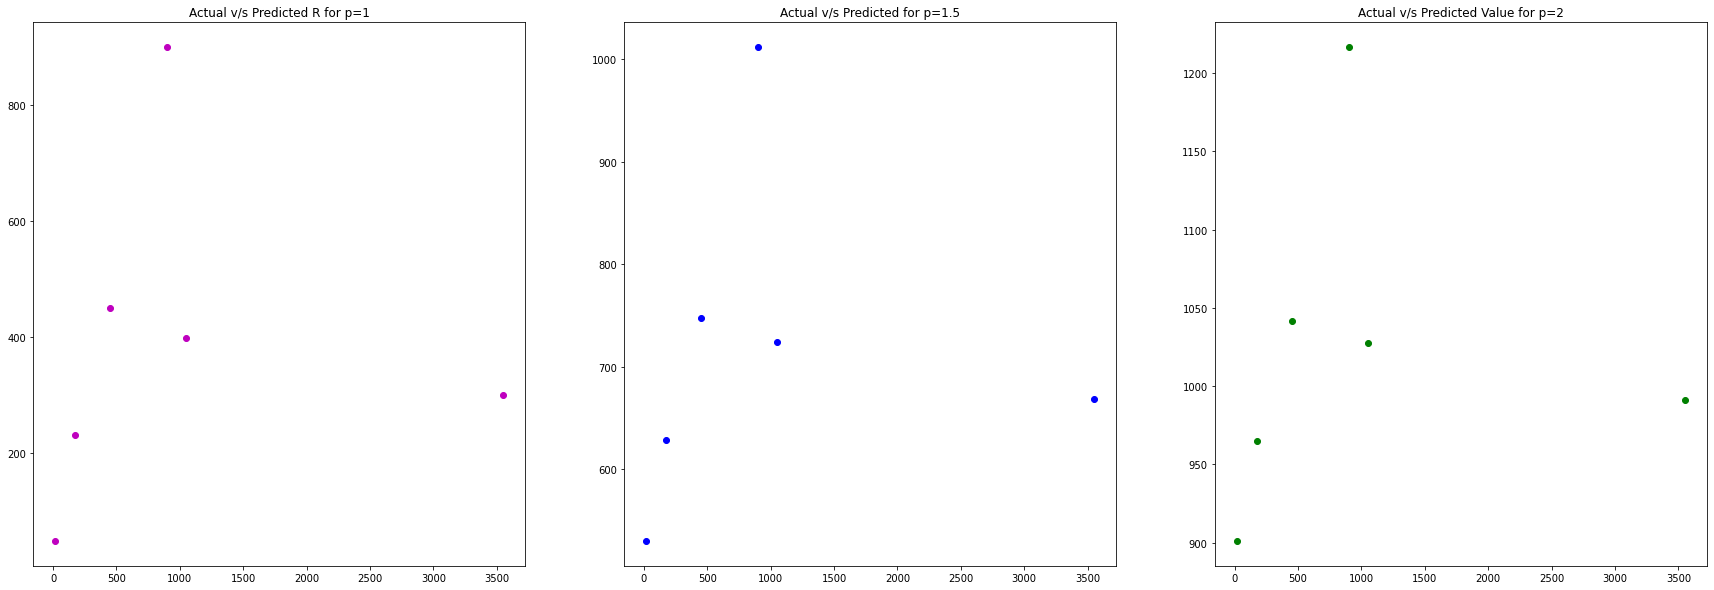

In [ ]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(1,3,figsize=(30,10))
axes[0].scatter(x='Ri',y='R1',data=df,color='m',label='p1')
axes[0].set_title("Actual v/s Predicted R for p=1")
axes[1].scatter(x='Ri',y='R2',data=df,color='b',label='p1.5')
axes[1].set_title("Actual v/s Predicted for p=1.5")
axes[2].scatter(x='Ri',y='R3',data=df,color='g',label='p2')
axes[2].set_title("Actual v/s Predicted Value for p=2")

**Residual versus forecasted plot**

In [ ]:
#calculate the residuals
residuals1 = df['Ri']-df['R1']
residuals2 = df['Ri']-df['R2']
residuals3 = df['Ri']-df['R3']
#create a dataframe
df1 = pd.DataFrame({'Ri' :df['Ri'], 'R1' : df['R1'], 'Qi(1)' : residuals1, 'R2' : df['R2'], 'Qi(2)' : residuals2, 'R3' : df['R3'], 'Qi(3)' : residuals3})
df1.head()

,Ri,R1,Qi(1),R2,Qi(2),R3,Qi(3)
0,175,230.171652,-5.517165e+01,628.702106,-453.702106,965.201228,-790.201228
1,450,449.999999,1.194778e-06,747.407462,-297.407462,1041.921564,-591.921564
2,1050,398.270402,6.517296e+02,724.183923,325.816077,1027.716847,22.283153
3,900,899.999999,6.375000e-07,1012.052169,-112.052169,1216.663242,-316.663242
4,19,47.876800,-2.887680e+01,529.647911,-510.647911,901.076249,-882.076249


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Qi(1)')

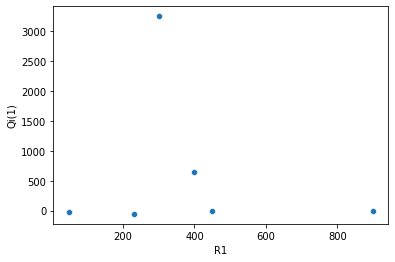

In [ ]:
#plot the residuals
import seaborn as sns
p = sns.scatterplot(df['R1'],residuals1)
plt.xlabel('R1')
plt.ylabel('Qi(1)')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Qi(2)')

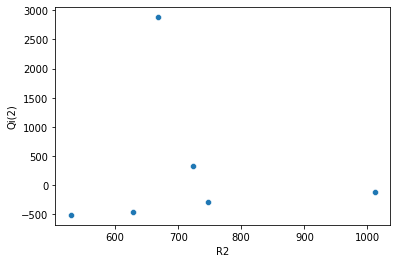

In [ ]:
p = sns.scatterplot(df['R2'],residuals2)
plt.xlabel('R2')
plt.ylabel('Qi(2)')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Qi(3)')

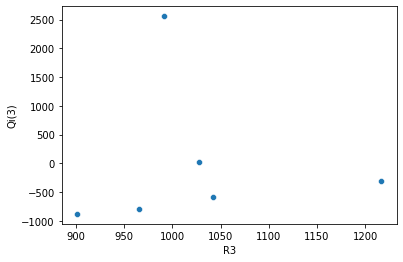

In [ ]:
p = sns.scatterplot(df['R3'],residuals3)
plt.xlabel('R3')
plt.ylabel('Qi(3)')

**Report on Exercise 2 part 1:**

The LP formulation for the problem when p=1 is as follows:

$min∑_{i=1}^6|Qi|$

$s.t. |Qi|>=Qi$  and  $|Qi|>= -Qi$

$a0>=0$

$where Qi=Ri−(a0+a1∗Ti+a2∗Di)$

$R_i$ is the actual revenue and $Q_i$ is the difference between actual and predicted revenue

$T_i$ denotes the daily average view-time per view

$D_i$ denotes the daily average number of unskipped ads per view




**Report on Exercise 2 part 4:**

Solver Status: ok

Solver Termination Condition: Optimal

**Objective** =  3986.158753

**Decision Variables:**

a0 =  0.0

a1 =  4.0039722

a2 =  8969.6127

Observations:
The calculated revenue does not depend upon a0 and it is highly affected by Di and least affected by Ti

**Report on Exercise 2 part 5:**

The LP formulation when p>1, a0>=0 is as follows:

$ min \sum_{i=1}^6 |Qi|^p $

s.t. $|Qi|^p>=Qi^p$ and $|Qi|^p>= -Qi^p$

where $ Q_i= R_i- (a_0+a_1*T_i+a_2*D_i) $

$a_0>=0$

$R_i$ is the actual revenue and $Q_i$ is the difference between actual and predicted revenue

$T_i$ denotes the daily average view-time per view

$D_i$ denotes the daily average number of unskipped ads per view

**Report on Exercise 2 part 7:**

**When p = 1.5**

Solver Status: ok

Solver Termination Condition: Optimal

Time taken to solve: 0.018645048141479492 units

**Objective** =  188066.92403421344

**Decision Variables:**

a0 =  503.74058049349685

a1 =  2.723598706569999

a2 =  4802.720279141072

**When p = 2**

Solver Status: ok

Solver Termination Condition: Optimal

Time taken to solve: 0.022211790084838867

**Objective** =  8399946.934010398

**Decision Variables:**

a0 =  884.3228326047202

a1 =  1.856236216800654

a2 =  3097.070581130479

Observations: The effect on calculated Ri due to a1 and a2 decreases when p=2 as compared to p = 1.5 but the effect due to a0 increases. The time taken to solve the LP when p=2 is slightly greater than time taken when p=1. Also, the objective function increased highly when p=2.

**Report on Exercise 2 part 8:**
Plot is above.
Since, we can see in all the plots of residual v/s forecasted there is a pattern in the data points, hence we can say that this model is not so good fit for the data.

**Report on Exercise 2 part 9:**

Taking p=1 gives us the best fit to the model since Qi(difference between actual and forecasted value of revenue) is minimum (for all i = 1, 2, 3, 4, 5, 6) as compared to the models when p=1.5 and p=2.